# Objectif

- Reprendre l'apprentissage de la dernière séance.
- Elargir à d'autres modèles.(Regarder la partie régression de la documentation de `scikit-learn`).
- Utiliser `GridSearchCV` et `RandomSearchCV` pour sélectionner le meilleur modèle par cross validation.

# Génération échantillon

In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
# Variables globales
# Code limité à un notebook
# Une seule cellule contenant des variables globales
# Tout en majuscule pour bien signaler leur aspect
NB_POINTS = 100
BRUIT = 0.05
A, B = -1.5, 3.

In [3]:
def cible(x):
    return np.exp(1. / (2. + np.sin(5 * x) * np.cos(7 * x)))

In [4]:
X = np.linspace(A, B, NB_POINTS)[:, np.newaxis]
y = (cible(X) * (
    1. + np.random.uniform(
        low=-BRUIT, 
        high=BRUIT, 
        size=X.shape
    )
)).reshape((-1,))

In [5]:
X.shape

(100, 1)

In [6]:
y.shape

(100,)

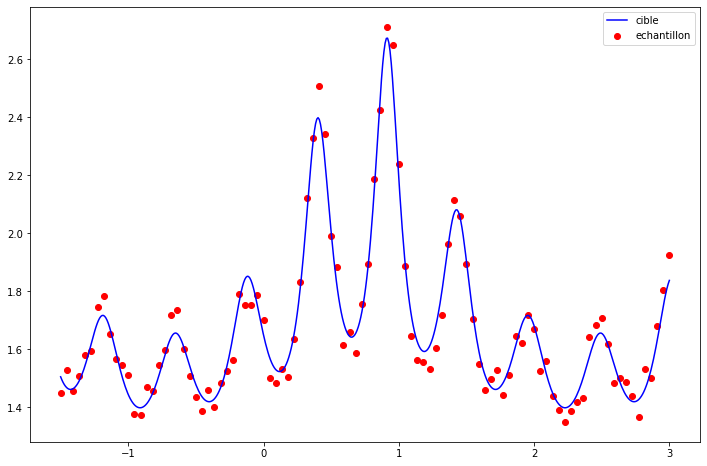

In [7]:
fig, rep = plt.subplots(figsize=(12, 8))
x_aff = np.linspace(A, B, 500)
y_aff = cible(x_aff)
rep.plot(x_aff, y_aff, color="blue", label="cible")
rep.scatter(X, y, color="red", label="echantillon")
rep.legend();

# Apprentissage

In [8]:
from sklearn.preprocessing import MinMaxScaler, PolynomialFeatures
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.linear_model import LinearRegression
from sklearn.pipeline import Pipeline

In [9]:
X_tr, X_te, y_tr, y_te = train_test_split(X, y)

In [10]:
resultats = dict()

## Régression linéaire pure

In [11]:
p = Pipeline(
    [
        ("Norm", MinMaxScaler()),
        ("Poly", PolynomialFeatures()),
        ("Reg", LinearRegression()),
    ]
)
p.get_params()

{'memory': None,
 'steps': [('Norm', MinMaxScaler()),
  ('Poly', PolynomialFeatures()),
  ('Reg', LinearRegression())],
 'verbose': False,
 'Norm': MinMaxScaler(),
 'Poly': PolynomialFeatures(),
 'Reg': LinearRegression(),
 'Norm__clip': False,
 'Norm__copy': True,
 'Norm__feature_range': (0, 1),
 'Poly__degree': 2,
 'Poly__include_bias': True,
 'Poly__interaction_only': False,
 'Poly__order': 'C',
 'Reg__copy_X': True,
 'Reg__fit_intercept': True,
 'Reg__n_jobs': None,
 'Reg__normalize': 'deprecated',
 'Reg__positive': False}

In [12]:
%%time
g = GridSearchCV(
    p,
    {
        'Norm__feature_range': [(-1., 1.), (0., 1.), (A, B)],
        'Poly__degree': range(5, 90, 6),
        "Reg__fit_intercept": [True, False],
    },
)

g.fit(X_tr, y_tr)

CPU times: user 1.83 s, sys: 408 ms, total: 2.23 s
Wall time: 1.35 s


GridSearchCV(estimator=Pipeline(steps=[('Norm', MinMaxScaler()),
                                       ('Poly', PolynomialFeatures()),
                                       ('Reg', LinearRegression())]),
             param_grid={'Norm__feature_range': [(-1.0, 1.0), (0.0, 1.0),
                                                 (-1.5, 3.0)],
                         'Poly__degree': range(5, 90, 6),
                         'Reg__fit_intercept': [True, False]})

In [13]:
resultats["Lineaire pure"] = g

## Modèles linéaires pénalisés

- Ridge (pénalisation par norme 2)
- Lasso (pénalisation par norme 1)
- ElasticNet (combinaison des deux)

In [14]:
from sklearn.linear_model import Ridge, Lasso, ElasticNet

### Ridge

In [15]:
p = Pipeline(
    [
        ("Norm", MinMaxScaler()),
        ("Poly", PolynomialFeatures()),
        ("Reg", Ridge()),
    ]
)

In [16]:
p.get_params()

{'memory': None,
 'steps': [('Norm', MinMaxScaler()),
  ('Poly', PolynomialFeatures()),
  ('Reg', Ridge())],
 'verbose': False,
 'Norm': MinMaxScaler(),
 'Poly': PolynomialFeatures(),
 'Reg': Ridge(),
 'Norm__clip': False,
 'Norm__copy': True,
 'Norm__feature_range': (0, 1),
 'Poly__degree': 2,
 'Poly__include_bias': True,
 'Poly__interaction_only': False,
 'Poly__order': 'C',
 'Reg__alpha': 1.0,
 'Reg__copy_X': True,
 'Reg__fit_intercept': True,
 'Reg__max_iter': None,
 'Reg__normalize': 'deprecated',
 'Reg__positive': False,
 'Reg__random_state': None,
 'Reg__solver': 'auto',
 'Reg__tol': 0.001}

In [17]:
%%time
g = GridSearchCV(
    p,
    {
        'Norm__feature_range': [(-1., 1.), (0., 1.), (A, B)],
        'Poly__degree': range(5, 90, 6),
        "Reg__fit_intercept": [True, False],
        "Reg__alpha": [0.01, 0.1, 1., 10.],
        "Reg__solver": ["svd", "lsqr"],
    },
)

g.fit(X_tr, y_tr)

CPU times: user 38.8 s, sys: 19.7 s, total: 58.5 s
Wall time: 17.8 s


GridSearchCV(estimator=Pipeline(steps=[('Norm', MinMaxScaler()),
                                       ('Poly', PolynomialFeatures()),
                                       ('Reg', Ridge())]),
             param_grid={'Norm__feature_range': [(-1.0, 1.0), (0.0, 1.0),
                                                 (-1.5, 3.0)],
                         'Poly__degree': range(5, 90, 6),
                         'Reg__alpha': [0.01, 0.1, 1.0, 10.0],
                         'Reg__fit_intercept': [True, False],
                         'Reg__solver': ['svd', 'lsqr']})

In [18]:
resultats["Ridge"] = g

### Lasso

In [19]:
p = Pipeline(
    [
        ("Norm", MinMaxScaler()),
        ("Poly", PolynomialFeatures()),
        ("Reg", Lasso()),
    ]
)
p.get_params()

{'memory': None,
 'steps': [('Norm', MinMaxScaler()),
  ('Poly', PolynomialFeatures()),
  ('Reg', Lasso())],
 'verbose': False,
 'Norm': MinMaxScaler(),
 'Poly': PolynomialFeatures(),
 'Reg': Lasso(),
 'Norm__clip': False,
 'Norm__copy': True,
 'Norm__feature_range': (0, 1),
 'Poly__degree': 2,
 'Poly__include_bias': True,
 'Poly__interaction_only': False,
 'Poly__order': 'C',
 'Reg__alpha': 1.0,
 'Reg__copy_X': True,
 'Reg__fit_intercept': True,
 'Reg__max_iter': 1000,
 'Reg__normalize': 'deprecated',
 'Reg__positive': False,
 'Reg__precompute': False,
 'Reg__random_state': None,
 'Reg__selection': 'cyclic',
 'Reg__tol': 0.0001,
 'Reg__warm_start': False}

In [20]:
%%time
g = GridSearchCV(
    p,
    {
        'Norm__feature_range': [(-1., 1.), (0., 1.), (A, B)],
        'Poly__degree': range(5, 90, 6),
        "Reg__fit_intercept": [True, False],
        "Reg__alpha": [0.01, 0.1, 1., 10.],
        "Reg__max_iter": [10000],
    },
)
g.fit(X_tr, y_tr)

/home/vincent/miniconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:645: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.763e+00, tolerance: 5.246e-04
  model = cd_fast.enet_coordinate_descent(
/home/vincent/miniconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:645: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.677e+00, tolerance: 4.746e-04
  model = cd_fast.enet_coordinate_descent(
/home/vincent/miniconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:645: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Du

CPU times: user 36.8 s, sys: 77.9 ms, total: 36.8 s
Wall time: 36.7 s


/home/vincent/miniconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:645: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 7.517e+01, tolerance: 1.816e-02
  model = cd_fast.enet_coordinate_descent(


GridSearchCV(estimator=Pipeline(steps=[('Norm', MinMaxScaler()),
                                       ('Poly', PolynomialFeatures()),
                                       ('Reg', Lasso())]),
             param_grid={'Norm__feature_range': [(-1.0, 1.0), (0.0, 1.0),
                                                 (-1.5, 3.0)],
                         'Poly__degree': range(5, 90, 6),
                         'Reg__alpha': [0.01, 0.1, 1.0, 10.0],
                         'Reg__fit_intercept': [True, False],
                         'Reg__max_iter': [10000]})

In [21]:
resultats["Lasso"] = g

**REMARQUE** difficultés à faire converger le Lasso.

### ElasticNet

In [22]:
%%time
p = Pipeline(
    [
        ("Norm", MinMaxScaler()),
        ("Poly", PolynomialFeatures()),
        ("Reg", ElasticNet()),
    ]
)
p.get_params()

CPU times: user 229 µs, sys: 60 µs, total: 289 µs
Wall time: 294 µs


{'memory': None,
 'steps': [('Norm', MinMaxScaler()),
  ('Poly', PolynomialFeatures()),
  ('Reg', ElasticNet())],
 'verbose': False,
 'Norm': MinMaxScaler(),
 'Poly': PolynomialFeatures(),
 'Reg': ElasticNet(),
 'Norm__clip': False,
 'Norm__copy': True,
 'Norm__feature_range': (0, 1),
 'Poly__degree': 2,
 'Poly__include_bias': True,
 'Poly__interaction_only': False,
 'Poly__order': 'C',
 'Reg__alpha': 1.0,
 'Reg__copy_X': True,
 'Reg__fit_intercept': True,
 'Reg__l1_ratio': 0.5,
 'Reg__max_iter': 1000,
 'Reg__normalize': 'deprecated',
 'Reg__positive': False,
 'Reg__precompute': False,
 'Reg__random_state': None,
 'Reg__selection': 'cyclic',
 'Reg__tol': 0.0001,
 'Reg__warm_start': False}

In [23]:
%%time
g = GridSearchCV(
    p,
    {
        'Norm__feature_range': [(-1., 1.), (0., 1.), (A, B)],
        'Poly__degree': range(5, 90, 6),
        "Reg__fit_intercept": [True, False],
        "Reg__alpha": [0.1, 1., 10.],
        "Reg__l1_ratio": [0.1, 0.5, 0.9],
        "Reg__max_iter": [10000],
    },
    n_jobs=-1,
)
g.fit(X_tr, y_tr)

/home/vincent/miniconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:645: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.092e+00, tolerance: 6.051e-04
  model = cd_fast.enet_coordinate_descent(
/home/vincent/miniconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:645: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.339e+00, tolerance: 6.397e-04
  model = cd_fast.enet_coordinate_descent(
/home/vincent/miniconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:645: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Du

CPU times: user 4.99 s, sys: 246 ms, total: 5.24 s
Wall time: 48.6 s


/home/vincent/miniconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:645: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.446e+00, tolerance: 6.866e-04
  model = cd_fast.enet_coordinate_descent(


GridSearchCV(estimator=Pipeline(steps=[('Norm', MinMaxScaler()),
                                       ('Poly', PolynomialFeatures()),
                                       ('Reg', ElasticNet())]),
             n_jobs=-1,
             param_grid={'Norm__feature_range': [(-1.0, 1.0), (0.0, 1.0),
                                                 (-1.5, 3.0)],
                         'Poly__degree': range(5, 90, 6),
                         'Reg__alpha': [0.1, 1.0, 10.0],
                         'Reg__fit_intercept': [True, False],
                         'Reg__l1_ratio': [0.1, 0.5, 0.9],
                         'Reg__max_iter': [10000]})

In [24]:
resultats["Elastic Net"] = g

**REMARQUE** problème de convergence du solveur là aussi.

## Méthode des K voisins

In [25]:
from sklearn.neighbors import KNeighborsRegressor

In [26]:
p = Pipeline(
    [
        ("Norm", MinMaxScaler()),
        ("Poly", PolynomialFeatures()),
        ("Reg", KNeighborsRegressor()),
    ]
)
p.get_params()

{'memory': None,
 'steps': [('Norm', MinMaxScaler()),
  ('Poly', PolynomialFeatures()),
  ('Reg', KNeighborsRegressor())],
 'verbose': False,
 'Norm': MinMaxScaler(),
 'Poly': PolynomialFeatures(),
 'Reg': KNeighborsRegressor(),
 'Norm__clip': False,
 'Norm__copy': True,
 'Norm__feature_range': (0, 1),
 'Poly__degree': 2,
 'Poly__include_bias': True,
 'Poly__interaction_only': False,
 'Poly__order': 'C',
 'Reg__algorithm': 'auto',
 'Reg__leaf_size': 30,
 'Reg__metric': 'minkowski',
 'Reg__metric_params': None,
 'Reg__n_jobs': None,
 'Reg__n_neighbors': 5,
 'Reg__p': 2,
 'Reg__weights': 'uniform'}

In [27]:
%%time
g = GridSearchCV(
    p,
    {
        'Norm__feature_range': [(-1., 1.), (0., 1.), (A, B)],
        'Poly__degree': range(5, 70, 6),
        "Reg__n_neighbors": range(3, 15, 2),
    },
    n_jobs=-1,
)
g.fit(X_tr, y_tr)

CPU times: user 846 ms, sys: 20.5 ms, total: 867 ms
Wall time: 1.79 s


GridSearchCV(estimator=Pipeline(steps=[('Norm', MinMaxScaler()),
                                       ('Poly', PolynomialFeatures()),
                                       ('Reg', KNeighborsRegressor())]),
             n_jobs=-1,
             param_grid={'Norm__feature_range': [(-1.0, 1.0), (0.0, 1.0),
                                                 (-1.5, 3.0)],
                         'Poly__degree': range(5, 70, 6),
                         'Reg__n_neighbors': range(3, 15, 2)})

## Régression par support vecteurs

In [28]:
from sklearn.svm import SVR

In [29]:
p = Pipeline(
    [
        ("Norm", MinMaxScaler()),
        ("Poly", PolynomialFeatures()),
        ("Reg", SVR()),
    ]
)
p.get_params()

{'memory': None,
 'steps': [('Norm', MinMaxScaler()),
  ('Poly', PolynomialFeatures()),
  ('Reg', SVR())],
 'verbose': False,
 'Norm': MinMaxScaler(),
 'Poly': PolynomialFeatures(),
 'Reg': SVR(),
 'Norm__clip': False,
 'Norm__copy': True,
 'Norm__feature_range': (0, 1),
 'Poly__degree': 2,
 'Poly__include_bias': True,
 'Poly__interaction_only': False,
 'Poly__order': 'C',
 'Reg__C': 1.0,
 'Reg__cache_size': 200,
 'Reg__coef0': 0.0,
 'Reg__degree': 3,
 'Reg__epsilon': 0.1,
 'Reg__gamma': 'scale',
 'Reg__kernel': 'rbf',
 'Reg__max_iter': -1,
 'Reg__shrinking': True,
 'Reg__tol': 0.001,
 'Reg__verbose': False}

In [30]:
%%time
g = GridSearchCV(
    p,
    {
        'Norm__feature_range': [(-1., 1.), (0., 1.), (A, B)],
        'Poly__degree': range(5, 90, 6),
        "Reg__C": [ 0.1, 1., 10., 100,],
        "Reg__epsilon": [0.01, 0.1, 1., 10.],
    },
    n_jobs=-1,
)
g.fit(X_tr, y_tr)

CPU times: user 2.84 s, sys: 12.8 ms, total: 2.85 s
Wall time: 5.16 s


GridSearchCV(estimator=Pipeline(steps=[('Norm', MinMaxScaler()),
                                       ('Poly', PolynomialFeatures()),
                                       ('Reg', SVR())]),
             n_jobs=-1,
             param_grid={'Norm__feature_range': [(-1.0, 1.0), (0.0, 1.0),
                                                 (-1.5, 3.0)],
                         'Poly__degree': range(5, 90, 6),
                         'Reg__C': [0.1, 1.0, 10.0, 100],
                         'Reg__epsilon': [0.01, 0.1, 1.0, 10.0]})

In [31]:
resultats["Support Vecteur"] = g

## Régression par Forêt aléatoire 

In [32]:
from sklearn.ensemble import RandomForestRegressor

In [33]:
p = Pipeline(
    [
        ("Norm", MinMaxScaler()),
        ("Poly", PolynomialFeatures()),
        ("Reg", RandomForestRegressor()),
    ]
)
p.get_params()

{'memory': None,
 'steps': [('Norm', MinMaxScaler()),
  ('Poly', PolynomialFeatures()),
  ('Reg', RandomForestRegressor())],
 'verbose': False,
 'Norm': MinMaxScaler(),
 'Poly': PolynomialFeatures(),
 'Reg': RandomForestRegressor(),
 'Norm__clip': False,
 'Norm__copy': True,
 'Norm__feature_range': (0, 1),
 'Poly__degree': 2,
 'Poly__include_bias': True,
 'Poly__interaction_only': False,
 'Poly__order': 'C',
 'Reg__bootstrap': True,
 'Reg__ccp_alpha': 0.0,
 'Reg__criterion': 'squared_error',
 'Reg__max_depth': None,
 'Reg__max_features': 'auto',
 'Reg__max_leaf_nodes': None,
 'Reg__max_samples': None,
 'Reg__min_impurity_decrease': 0.0,
 'Reg__min_samples_leaf': 1,
 'Reg__min_samples_split': 2,
 'Reg__min_weight_fraction_leaf': 0.0,
 'Reg__n_estimators': 100,
 'Reg__n_jobs': None,
 'Reg__oob_score': False,
 'Reg__random_state': None,
 'Reg__verbose': 0,
 'Reg__warm_start': False}

In [34]:
%%time
g = GridSearchCV(
    p,
    {
        'Norm__feature_range': [(-1., 1.), (0., 1.), (A, B)],
        'Poly__degree': range(5, 15, 2),
        "Reg__n_estimators": range(50, 300, 20),
    },
    n_jobs=-1,
)
g.fit(X_tr, y_tr)

CPU times: user 2.14 s, sys: 91.2 ms, total: 2.23 s
Wall time: 1min 30s


GridSearchCV(estimator=Pipeline(steps=[('Norm', MinMaxScaler()),
                                       ('Poly', PolynomialFeatures()),
                                       ('Reg', RandomForestRegressor())]),
             n_jobs=-1,
             param_grid={'Norm__feature_range': [(-1.0, 1.0), (0.0, 1.0),
                                                 (-1.5, 3.0)],
                         'Poly__degree': range(5, 15, 2),
                         'Reg__n_estimators': range(50, 300, 20)})

In [35]:
resultats["Foret Aleatoire"] = g

## Réseau de neurones

In [36]:
from sklearn.neural_network import MLPRegressor

In [37]:
p = Pipeline(
    [
        ("Norm", MinMaxScaler()),
        ("Poly", PolynomialFeatures()),
        ("Reg", MLPRegressor()),
    ]
)
p.get_params()

{'memory': None,
 'steps': [('Norm', MinMaxScaler()),
  ('Poly', PolynomialFeatures()),
  ('Reg', MLPRegressor())],
 'verbose': False,
 'Norm': MinMaxScaler(),
 'Poly': PolynomialFeatures(),
 'Reg': MLPRegressor(),
 'Norm__clip': False,
 'Norm__copy': True,
 'Norm__feature_range': (0, 1),
 'Poly__degree': 2,
 'Poly__include_bias': True,
 'Poly__interaction_only': False,
 'Poly__order': 'C',
 'Reg__activation': 'relu',
 'Reg__alpha': 0.0001,
 'Reg__batch_size': 'auto',
 'Reg__beta_1': 0.9,
 'Reg__beta_2': 0.999,
 'Reg__early_stopping': False,
 'Reg__epsilon': 1e-08,
 'Reg__hidden_layer_sizes': (100,),
 'Reg__learning_rate': 'constant',
 'Reg__learning_rate_init': 0.001,
 'Reg__max_fun': 15000,
 'Reg__max_iter': 200,
 'Reg__momentum': 0.9,
 'Reg__n_iter_no_change': 10,
 'Reg__nesterovs_momentum': True,
 'Reg__power_t': 0.5,
 'Reg__random_state': None,
 'Reg__shuffle': True,
 'Reg__solver': 'adam',
 'Reg__tol': 0.0001,
 'Reg__validation_fraction': 0.1,
 'Reg__verbose': False,
 'Reg__warm_

In [38]:
%%time
g = GridSearchCV(
    p,
    {
        'Norm__feature_range': [(-1., 1.), (0., 1.), (A, B)],
        'Poly__degree': range(10, 30, 3),
        'Reg__hidden_layer_sizes': [(50,), (100,), (150,), (200,), (250,), (300,),],
        "Reg__max_iter": [5000],
        "Reg__activation": ["relu", "logistic"],
    },
    n_jobs=-1,
)
g.fit(X_tr, y_tr)

CPU times: user 2.64 s, sys: 374 ms, total: 3.02 s
Wall time: 37 s


GridSearchCV(estimator=Pipeline(steps=[('Norm', MinMaxScaler()),
                                       ('Poly', PolynomialFeatures()),
                                       ('Reg', MLPRegressor())]),
             n_jobs=-1,
             param_grid={'Norm__feature_range': [(-1.0, 1.0), (0.0, 1.0),
                                                 (-1.5, 3.0)],
                         'Poly__degree': range(10, 30, 3),
                         'Reg__activation': ['relu', 'logistic'],
                         'Reg__hidden_layer_sizes': [(50,), (100,), (150,),
                                                     (200,), (250,), (300,)],
                         'Reg__max_iter': [5000]})

In [39]:
resultats["Reseau Neurones"] = g

## Bilan

In [40]:
from rich import print
from rich.table import Table

In [41]:
tbl = Table(
    title="Résumé des résultats de crossvalidation.",
    show_header=True,
)
tbl.add_column("Nom")
tbl.add_column("Score Cross validation")
tbl.add_column("Score entrainement")
tbl.add_column("Choix Hyperparamètres")
for nom, modele in resultats.items():
    tbl.add_row(
        nom, 
        f"{modele.best_score_:.2f}", 
        f"{modele.score(X_tr, y_tr):.2f}",
        str(modele.best_params_),
    )
    
print(tbl)

                          Résumé des résultats de crossvalidation.                           
┏━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━┓
┃ Nom             ┃ Score Cross validation ┃ Score entrainement ┃ Choix Hyperparamètres     ┃
┡━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━┩
│ Lineaire pure   │ -0.23                  │ 0.40               │ {'Norm__feature_range':   │
│                 │                        │                    │ (-1.5, 3.0),              │
│                 │                        │                    │ 'Poly__degree': 5,        │
│                 │                        │                    │ 'Reg__fit_intercept':     │
│                 │                        │                    │ False}                    │
│ Ridge           │ -0.02                  │ 0.35               │ {'Norm__feature_range':   │
│                 │                        │                    │ (-1.5, 3.0),              │
│                 │                        │                    │ 'Poly__degree': 5,        │
│                 │                        │                    │ 'Reg__alpha': 1.0,        │
│                 │                        │                    │ 'Reg__fit_intercept':     │
│                 │                        │                    │ False, 'Reg__solver':     │
│                 │                        │                    │ 'lsqr'}                   │
│ Lasso           │ -0.05                  │ 0.38               │ {'Norm__feature_range':   │
│                 │                        │                    │ (-1.5, 3.0),              │
│                 │                        │                    │ 'Poly__degree': 5,        │
│                 │                        │                    │ 'Reg__alpha': 0.01,       │
│                 │                        │                    │ 'Reg__fit_intercept':     │
│                 │                        │                    │ False, 'Reg__max_iter':   │
│                 │                        │                    │ 10000}                    │
│ Elastic Net     │ -0.13                  │ 0.37               │ {'Norm__feature_range':   │
│                 │                        │                    │ (-1.5, 3.0),              │
│                 │                        │                    │ 'Poly__degree': 47,       │
│                 │                        │                    │ 'Reg__alpha': 0.1,        │
│                 │                        │                    │ 'Reg__fit_intercept':     │
│                 │                        │                    │ True, 'Reg__l1_ratio':    │
│                 │                        │                    │ 0.1, 'Reg__max_iter':     │
│                 │                        │                    │ 10000}                    │
│ Support Vecteur │ 0.01                   │ 0.25               │ {'Norm__feature_range':   │
│                 │                        │                    │ (0.0, 1.0),               │
│                 │                        │                    │ 'Poly__degree': 17,       │
│                 │                        │                    │ 'Reg__C': 1.0,            │
│                 │                        │                    │ 'Reg__epsilon': 0.1}      │
│ Foret Aleatoire │ 0.77                   │ 0.98               │ {'Norm__feature_range':   │
│                 │                        │                    │ (0.0, 1.0),               │
│                 │                        │                    │ 'Poly__degree': 7,        │
│                 │                        │                    │ 'Reg__n_estimators': 130} │
│ Reseau Neurones │ 0.08                   │ 0.56               │ {'Norm__feature_range':   │
│                 │                        │                    │ (-1.5, 3.0),              │
│                 │                        │        

In [42]:
choix = resultats["Foret Aleatoire"]

In [43]:
choix.score(X_tr, y_tr)

0.9821104762604593

In [44]:
choix.score(X_te, y_te)

0.5305898457737406

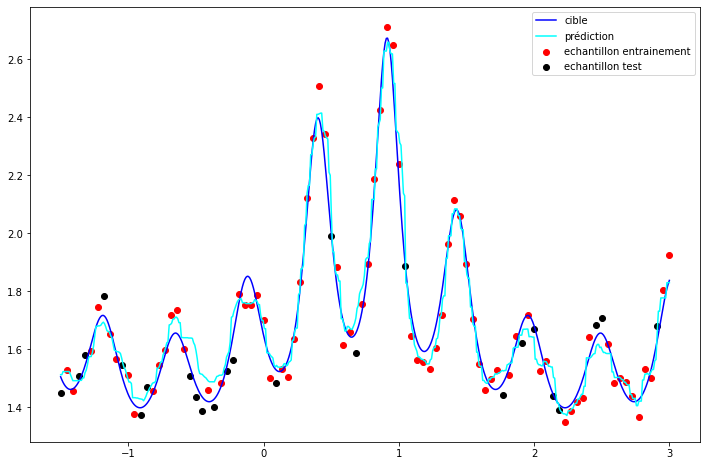

In [45]:
fig, rep = plt.subplots(figsize=(12, 8))
x_aff = np.linspace(A, B, 500)
y_aff = cible(x_aff)
rep.plot(x_aff, y_aff, color="blue", label="cible")
rep.scatter(X_tr, y_tr, color="red", label="echantillon entrainement")
rep.scatter(X_te, y_te, color="black", label="echantillon test")
rep.plot(x_aff, choix.predict(x_aff[:, np.newaxis]), color="cyan", label="prédiction")
rep.legend()

**Conclusion** 

- Au niveau des scores on constate du surapprentissage.
- Au niveau de la visualisation on a une allure plutôt bien reproduite.